In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

In [71]:
movies = 'data/ml-latest/movies.csv'
ratings = 'data/ml-latest/ratings.csv'

df_movies = pd.read_csv(movies, usecols=['movieId', 'title'], dtype={'movieId':'int32', 'title':'str'})
df_ratings = pd.read_csv(ratings, usecols=['userId', 'movieId', 'rating'], dtype={'userId':'int32', 'movieId': 'int32', 'rating':'float32'})

### a) EDA

In [72]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [73]:
df_ratings.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
5,1,381,3.5
6,1,596,4.0
7,1,1036,5.0
8,1,1049,3.0
9,1,1066,4.0


In [74]:
num_movies = df_movies.shape
num_ratings = df_ratings.shape
print(f'\nTotal number of movies and columns: {num_movies}')
print(f'Total number of ratings and columns: {num_ratings}')


Total number of movies and columns: (86537, 2)
Total number of ratings and columns: (33832162, 3)


### b) De 10 filmer med flest ratings

In [75]:
# Beräknar antalet ratings per film
ratings_per_movie = df_ratings.groupby('movieId').size().reset_index(name='num_ratings')
# Sorterar filmer efter nr ratings
sorted_movies = ratings_per_movie.sort_values(by='num_ratings', ascending=False)
# 10 filmer med flest ratings
top_10_movies = sorted_movies.head(10)
print('Top 10 Movies with Most Ratings')
print(top_10_movies)

Top 10 Movies with Most Ratings
      movieId  num_ratings
314       318       122296
351       356       113581
292       296       108756
2480     2571       107056
585       593       101802
257       260        97202
2867     2959        86207
522       527        84232
475       480        83026
1166     1196        80200


### c) Genomsnittliga ratingen för de 10 filmerna med flest ratings

In [76]:
# Lägger top 10 i lista
top_10_movie_ids = top_10_movies['movieId'].tolist()
# Tar medelvärdet av top 10
avg_ratings_top_10 = df_ratings[df_ratings['movieId'].isin(top_10_movie_ids)].groupby('movieId')['rating'].mean()
print('Average Ratings for Top 10 Movies')
print(avg_ratings_top_10)

Average Ratings for Top 10 Movies
movieId
260     4.092401
296     4.191778
318     4.416792
356     4.068189
480     3.689013
527     4.242337
593     4.150287
1196    4.118030
2571    4.160631
2959    4.236019
Name: rating, dtype: float32


### d) Plot över årtal och antalet filmer

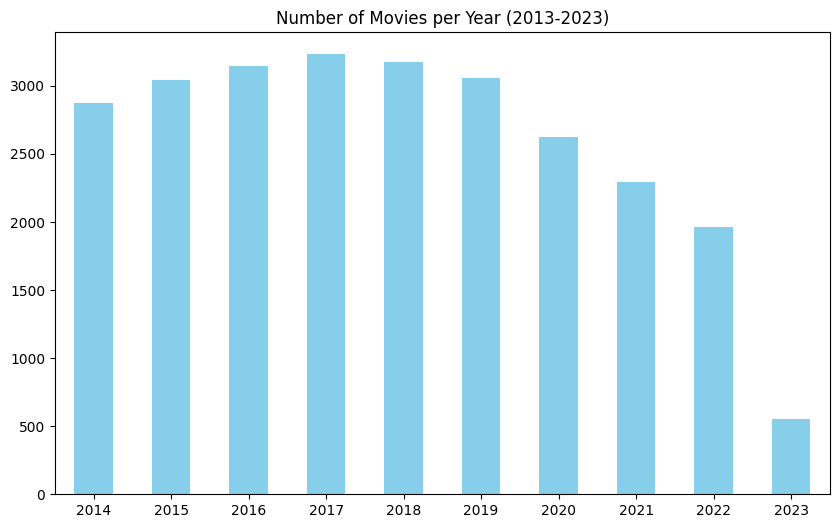

In [77]:
# Skapar en kopia av DataFrame för att undvika ändringar i originalet
df_movies_filtered = df_movies.copy()

# Extraherar år från titeln: (r'\((\d{4})\)') tar 4 siffror inom parentes, i detta fall år
df_movies_filtered['year'] = df_movies_filtered['title'].str.extract(r'\((\d{4})\)')

# Konverterar året till numeriskt format
df_movies_filtered['year'] = pd.to_numeric(df_movies_filtered['year'], errors='coerce').astype('Int32')

# Filtrerar ut filmer mellan 2013 och 2023
df_movies_filtered = df_movies_filtered[(df_movies_filtered['year'] >= 2014) & (df_movies_filtered['year'] <= 2023)]

# Grupperar och beräknar antalet filmer per år
movies_per_year_filtered = df_movies_filtered.groupby('year').size()

# Sorterar resultatet i fallande ordning och tar de sista 10 åren
movies_per_year_filtered_sorted = movies_per_year_filtered.sort_index(ascending=True).head(11)

fig, ax = plt.subplots(figsize=(10, 6))
movies_per_year_filtered_sorted.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Number of Movies per Year (2013-2023)')
ax.set_xlabel('')
ax.tick_params(axis='x', rotation=0)
plt.show()


### e) Plot över antalet ratings mot movieId

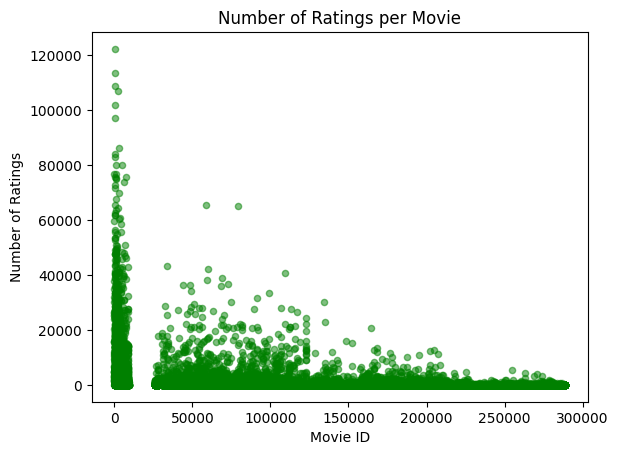

In [79]:
ratings_per_movie.plot.scatter(x='movieId', y='num_ratings', color='green', alpha=0.5)
plt.title('Number of Ratings per Movie')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.show()

### f) Genomsnittliga ratings för de top 10 filmerna med flest ratings

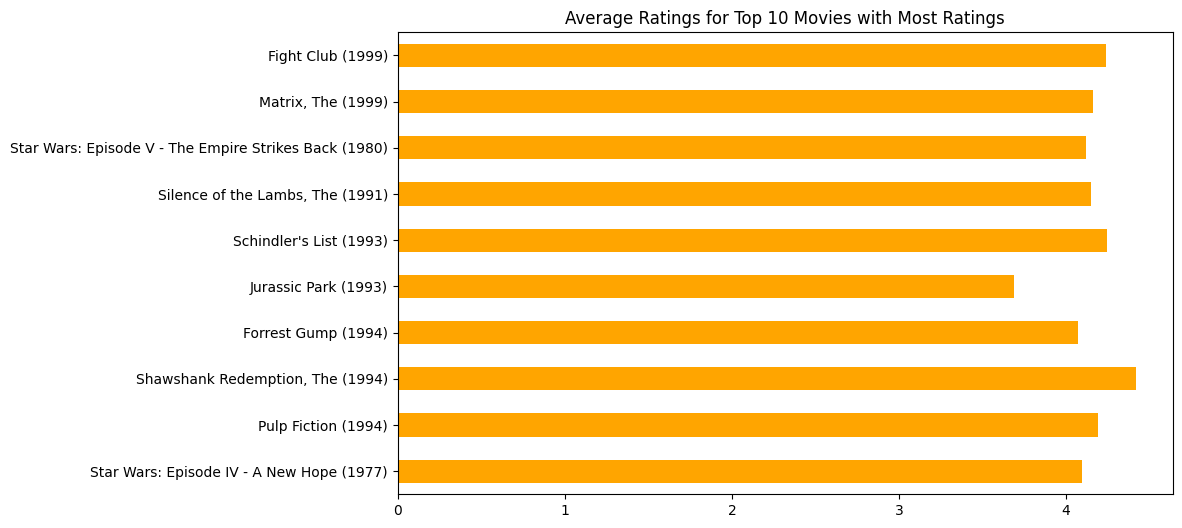

In [90]:
# Få de 10 filmer med flest betyg
top_10_movies = df_ratings['movieId'].value_counts().head(10).index

# Filtrera betyg för de 10 filmer med flest betyg
ratings_top_10 = df_ratings[df_ratings['movieId'].isin(top_10_movies)]

# Beräkna genomsnittliga betyg för varje film
average_ratings_top_10 = ratings_top_10.groupby('movieId')['rating'].mean()

# Hämta titlar för de 10 filmer med flest betyg
movie_titles = df_movies[df_movies['movieId'].isin(top_10_movies)].set_index('movieId')['title']

# Skapa plotten
# Skapa plotten med vända axlar
plt.figure(figsize=(10, 6))
average_ratings_top_10.index = movie_titles  # Sätt filmtitlar som index för att använda dem på y-axeln
average_ratings_top_10.plot(kind='barh', color='orange')  #'barh' ger liggande stapeldiagram
plt.title('Average Ratings for Top 10 Movies with Most Ratings')
plt.ylabel('')  # Använd filmtitlar istället för y-axeltexten
plt.show()

